In [2]:
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle =True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [5]:
class_names= dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

645

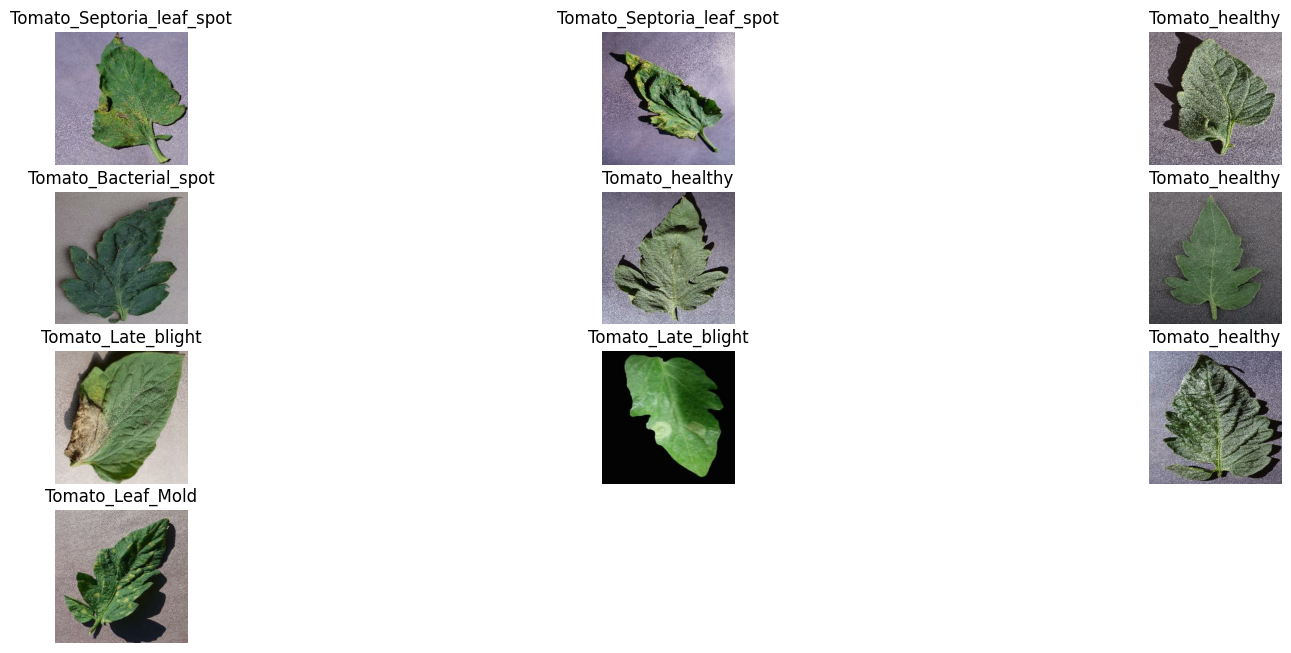

In [7]:
plt.figure(figsize=(20, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(5,3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        label_index = label_batch[i].numpy()
        class_name = class_names[label_index]  
        plt.title(class_name)
        plt.axis("off")

plt.show()


In [8]:
len(dataset)

645

In [9]:
import tensorflow as tf

def split_dataset(ds, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, shuffle=True, buffer_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(buffer_size, seed=42)
    train_size = int(train_ratio * ds_size)
    val_size = int(val_ratio * ds_size)
    
    train_ds = ds.take(train_size)
    remaining_ds = ds.skip(train_size)
    val_ds = remaining_ds.take(val_size)
    test_ds = remaining_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = split_dataset(dataset)

In [10]:
train_ds = dataset.take(516)
len(train_ds)

516

In [11]:
temp_test_ds = dataset.skip(516)
len(temp_test_ds)

129

In [12]:
val_size = 0.1
len(dataset) * val_size

64.5

In [13]:
val_ds = temp_test_ds.take(64)
len(val_ds)

64

In [14]:
test_ds = temp_test_ds.skip(64)
len(test_ds)

65

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shufflesize=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shufflesize, seed=12)  
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
   
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

516

In [20]:
len(val_ds)

64

In [21]:
len(test_ds)

65

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
n_classes = 15
IMAGE_SIZE = 256
CHANNELS = 3
rescale_factor = 1.0 / 255.0

In [26]:
#Model
model = Sequential([
    Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

In [27]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,527 (720.81 KB)

 Trainable params: 184,527 (720.81 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
)


Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1882s 4s/step - accuracy: 0.2731 - loss: 2.7496 - val_accuracy: 0.6685 - val_loss: 0.9751
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1561s 3s/step - accuracy: 0.7025 - loss: 0.9079 - val_accuracy: 0.7817 - val_loss: 0.6512
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 675s 1s/step - accuracy: 0.7962 - loss: 0.6112 - val_accuracy: 0.8252 - val_loss: 0.5089
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 729s 1s/step - accuracy: 0.8479 - loss: 0.4501 - val_accuracy: 0.8813 - val_loss: 0.3584
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.8783 - loss: 0.3596 - val_accuracy: 0.9004 - val_loss: 0.3076
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.8951 - loss: 0.3077 - val_accuracy: 0.9048 - val_loss: 0.2959
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 708s 1s/step - accuracy: 0.9035 - loss: 0.2876 - val_accuracy: 0.9233 - val_loss: 0.2147
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.9119 - loss: 0.2600 - val_ac

In [31]:
score = model.evaluate(test_ds)

65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.9615 - loss: 0.1305


In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 516}

In [33]:
history

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
acc = history.history['accuracy']
print("Training Accuracy:", acc)
val_acc = history.history['val_accuracy']  
print("Validation Accuracy:", val_acc)
loss = history.history['loss']
print("Training Loss:", loss)
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)

Training Accuracy: [0.43277615308761597, 0.724079430103302, 0.7969961166381836, 0.8475654125213623, 0.874454915523529, 0.8897165656089783, 0.9029796719551086, 0.9117006063461304, 0.9210876822471619, 0.9256298542022705, 0.934411346912384, 0.9315043687820435, 0.9366521239280701, 0.9441618323326111, 0.9487645626068115, 0.9527616500854492, 0.9519137740135193, 0.9515503644943237, 0.9468265771865845, 0.9529433250427246, 0.9686894416809082, 0.9568798542022705, 0.9582727551460266, 0.9620881676673889, 0.964026153087616, 0.9623304009437561, 0.961240291595459, 0.9605741500854492, 0.978500485420227, 0.9663275480270386]
Validation Accuracy: [0.66845703125, 0.78173828125, 0.8251953125, 0.88134765625, 0.900390625, 0.90478515625, 0.92333984375, 0.9296875, 0.82958984375, 0.96240234375, 0.921875, 0.93212890625, 0.93359375, 0.947265625, 0.912109375, 0.93017578125, 0.955078125, 0.9453125, 0.95556640625, 0.97021484375, 0.97119140625, 0.935546875, 0.9638671875, 0.958984375, 0.97607421875, 0.97021484375, 0.9

In [37]:
len(acc)

30

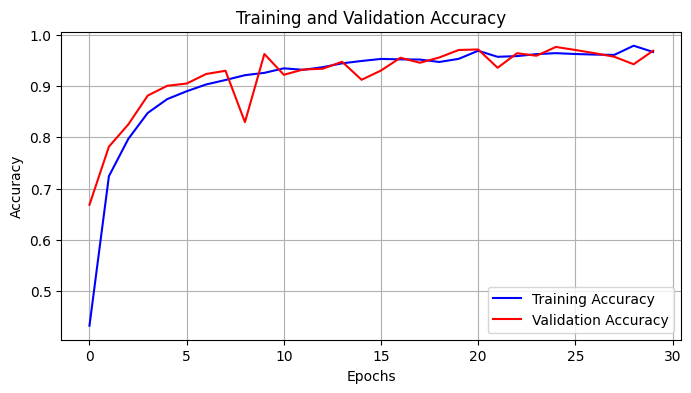

In [50]:
#Accuracy
epochs_range = range(len(acc))  
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


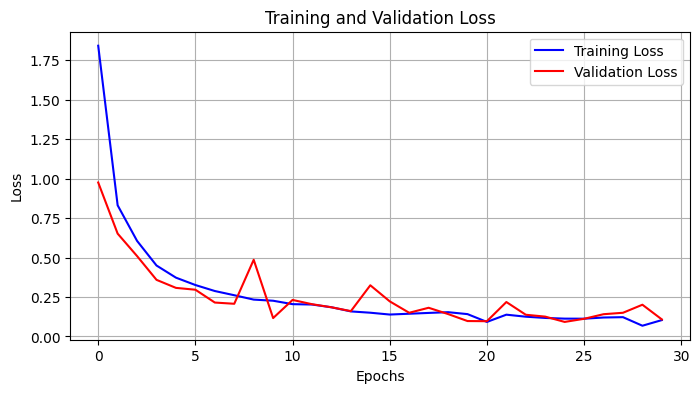

In [51]:
# Loss
plt.figure(figsize=(8, 4))

plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy()) 
    predictions = model.predict(images) 
    y_pred.extend(np.argmax(predictions, axis=1)) #predicted probabiltites to class labels conversion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [66]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_true, y_pred, average='macro')  
print("Precision:", precision)
recall = recall_score(y_true, y_pred, average='macro')
print("Recall:", recall)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix: \n", cm)

Accuracy: 0.96875
Precision: 0.9700260078130081
Recall: 0.9459838444194495
F1 Score: 0.9563931815631666
Confusion Matrix: 
 [[ 83   0   1   1   0   0   1   0   0   4   0   0   0   0   0]
 [  0 160   0   2   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 106   0   0   0   2   0   2   0   0   0   0   0]
 [  0   3   0   0  16   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 194   2   0   0   1   0   0   1   0   0]
 [  2   0   0   0   0   1  87   4   0   0   1   0   0   0   0]
 [  0   0   0   2   0   0   6 187   0   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   0  76   3   3   0   0   0   0]
 [  1   1   0   0   0   0   0   1   1 157   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   2 151   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0 313   0   0]
 [  0   0   0   0   0   0   0   0   0   5   3   0   0  29

First image to predict


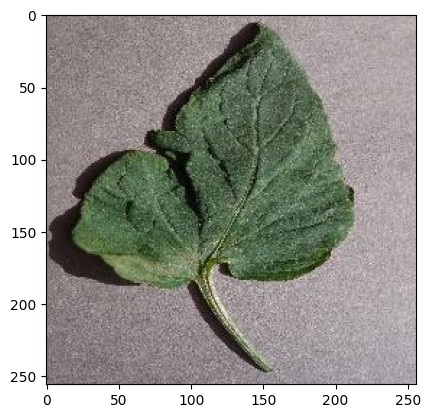

Actual label: Tomato__Target_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
predicted label: Tomato__Target_Spot


In [67]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()  
    print("Actual label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


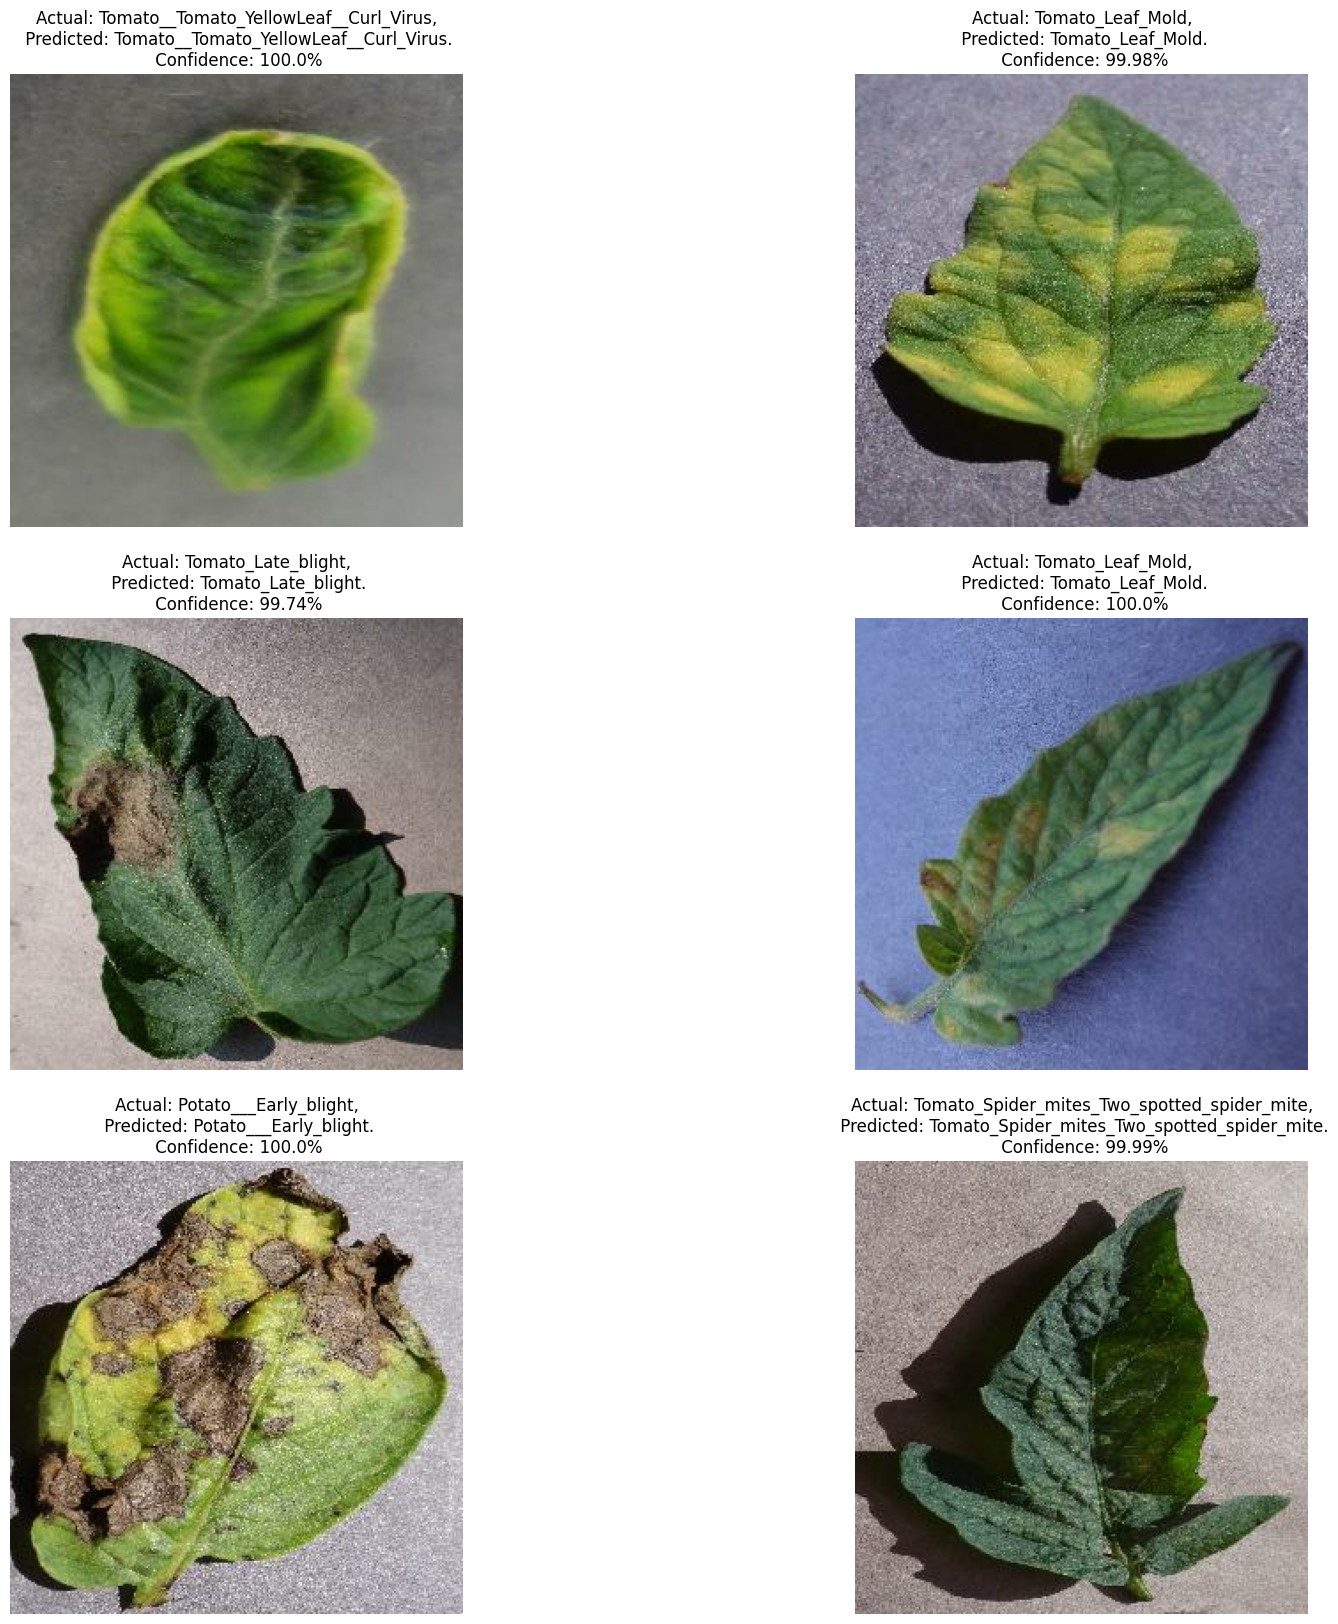

In [70]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 2, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    plt.show()


In [73]:
import os
directory = r"C:\Users\Abi Karimireddy\Downloads\deep learning\Training\final"
model_version = 1
model.save(f"{directory}{model_version}.keras")